## Analyzing screen

In [93]:
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore') 

import os
import pandas as pd

path = '../../dgym-data/analysis/mpo/'
files = os.listdir(path)
files = [path + f for f in files]

In [94]:
df = pd.concat([
    pd.read_csv(f, sep='\t') for f in files
]).reset_index(drop=True)

df = df.drop(columns='smiles')

In [127]:
from dgym.envs.utility import MultipleUtilityFunction, ClassicUtilityFunction

# create evaluators
docking_utility_function = ClassicUtilityFunction(
    ideal=(9, 13),
    acceptable=(8, 13)
)

log_P_utility_function = ClassicUtilityFunction(
    ideal=(0.5, 1.85),
    acceptable=(-0.5, 3.5)
)

log_S_utility_function = ClassicUtilityFunction(
    ideal=(-3, 1),
    acceptable=(-4, 1)
)

composite_utility_function = MultipleUtilityFunction([
    docking_utility_function, log_P_utility_function, log_S_utility_function])

In [128]:
df['Composite Utility'] = composite_utility_function(
    df.values,
    method='average'
)

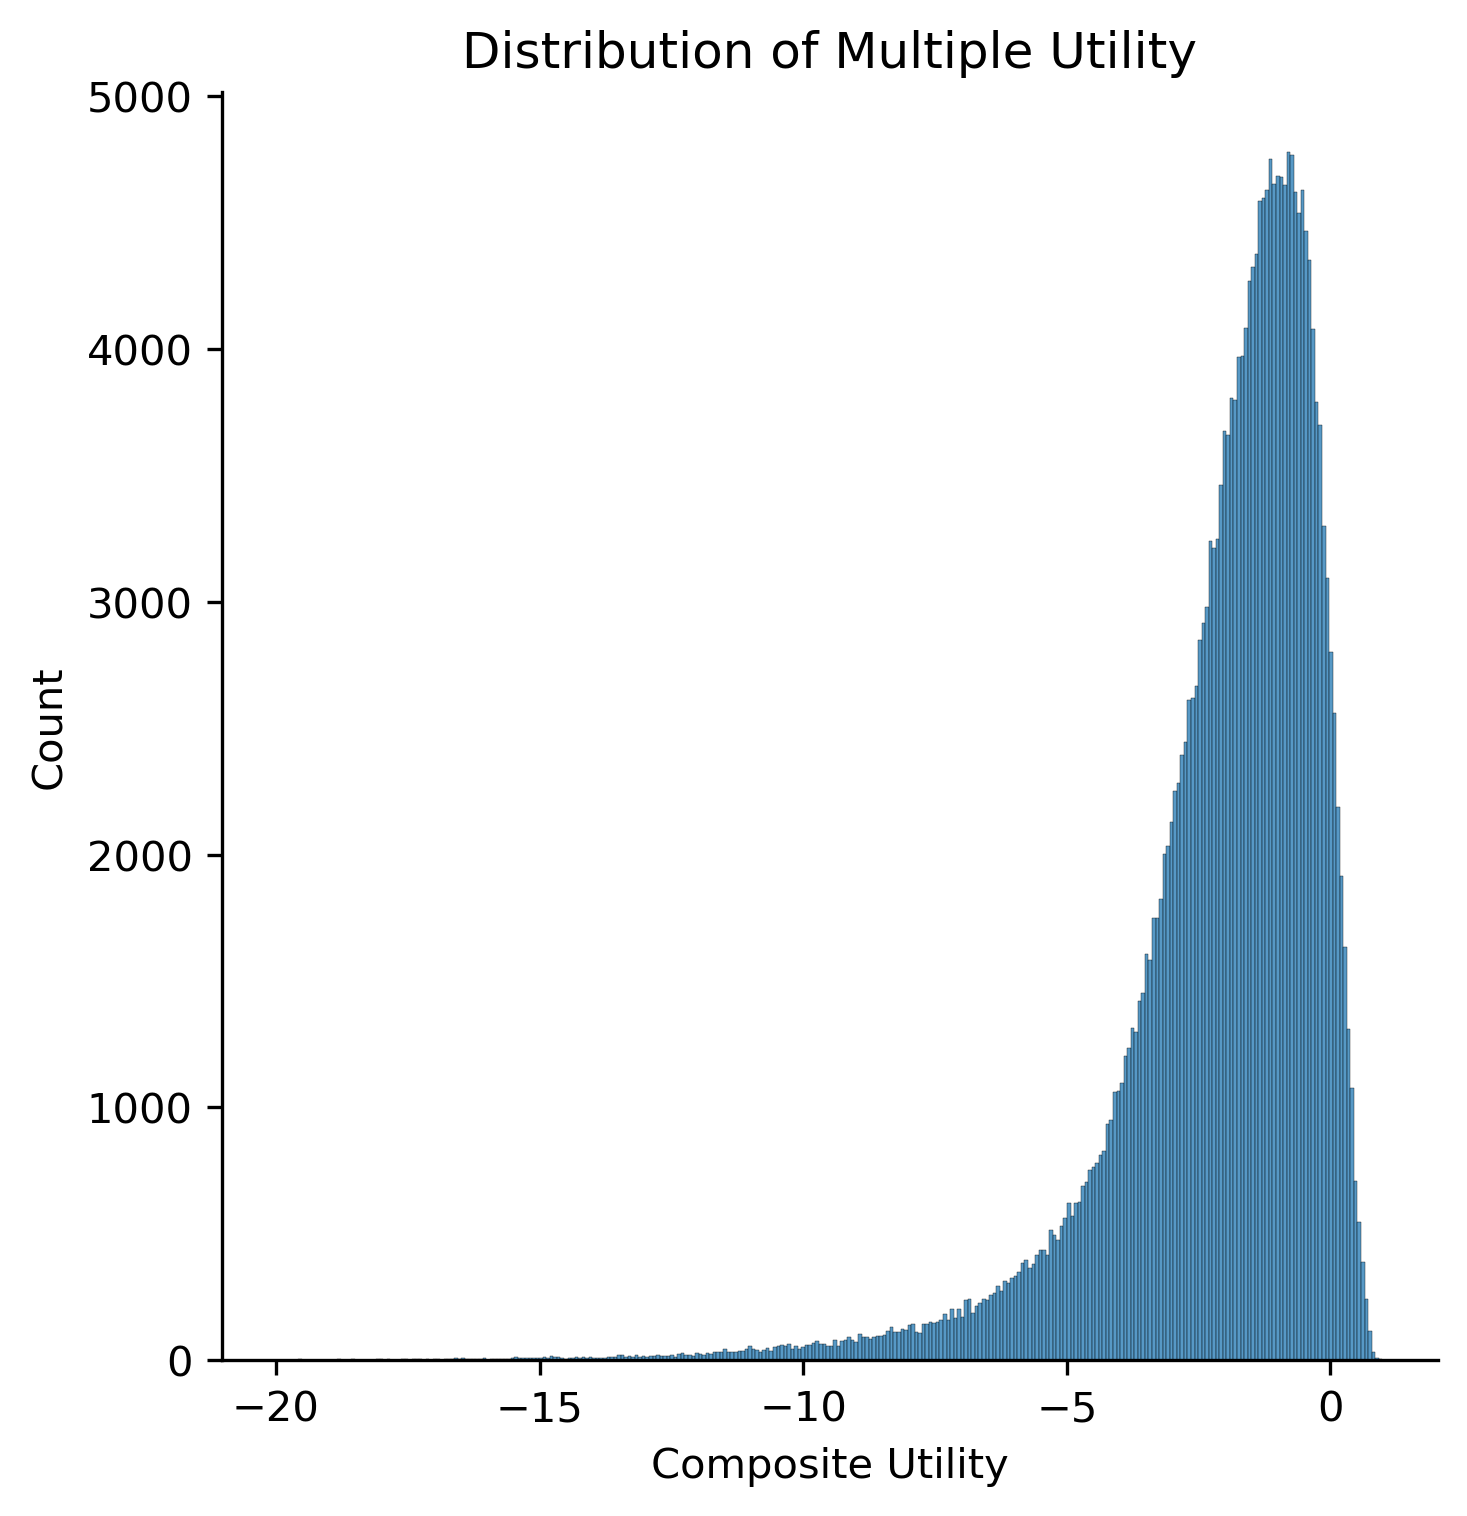

In [130]:
g = sns.displot(df.query('`Composite Utility` > -20')['Composite Utility'])
plt.title('Distribution of Multiple Utility')
plt.xlabel('Composite Utility')
g.fig.set_dpi(300)

<Figure size 1920x1440 with 0 Axes>

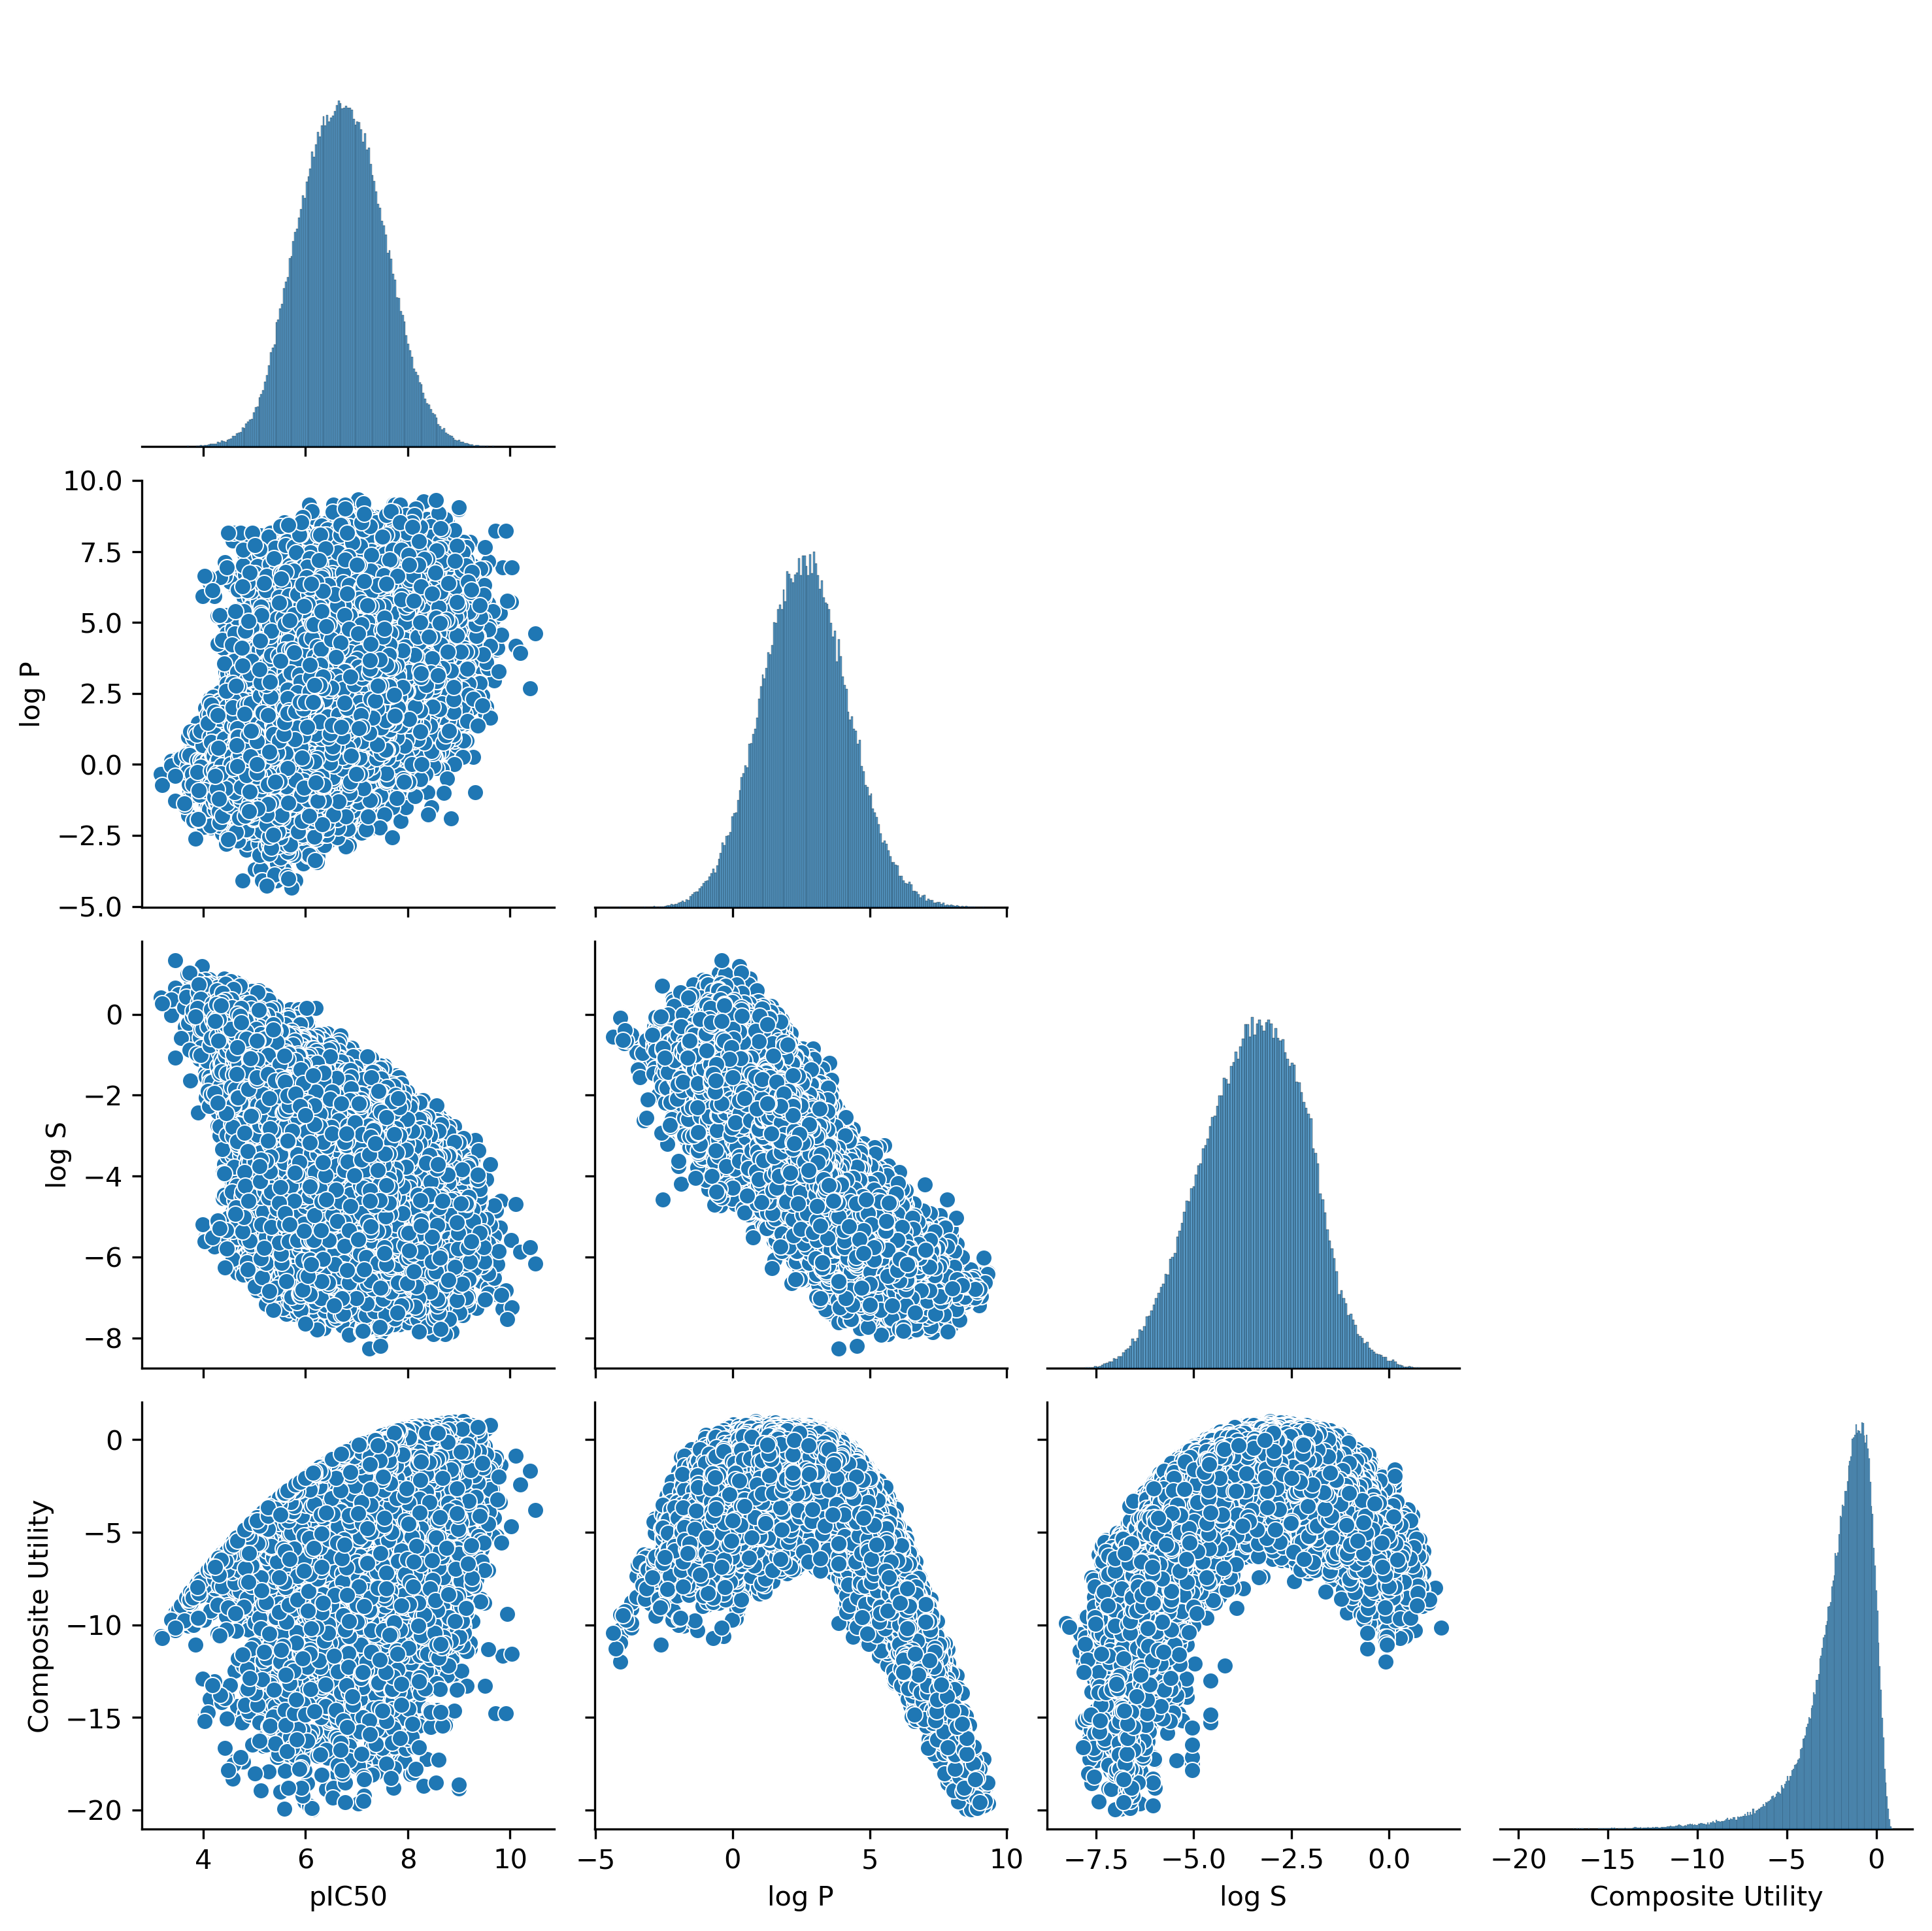

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=300)
g = sns.pairplot(
    (
        df
        .query('`Composite Utility` > -20')
        # .sort_values('mpo')
    ),
    corner=True,
    # hue='mpo'
)
g.fig.set_dpi(300)

In [146]:
import numpy as np
(df['Composite Utility'] > 0.9).sum()

5

In [140]:
len(df)

314700

In [148]:
(5 / len(df))*100

0.0015888147442008264

In [133]:
df.iloc[69915]

pIC50                9.612976
log P                1.652800
log S               -3.700195
Composite Utility    0.766602
Name: 69915, dtype: float64

In [106]:
df.shape

(314700, 4)